In [29]:
#import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:
#Store the data into the df variable
df = pd.read_csv('../data/dump.csv')

In [31]:
#Set the date as the index for the data
df = df.set_index(pd.DatetimeIndex(df['time'].values))
#Show the dataframe
# df

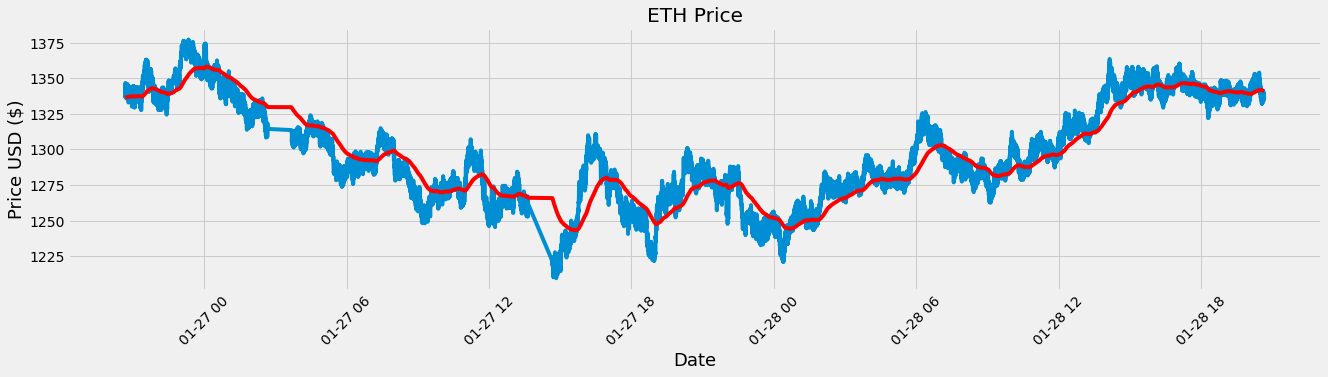

In [32]:
# Visually Show The Stock Price(s)
# Create the title
title = 'ETH Price'
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
plt.plot( my_stocks['price'],  label='price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

# just_ema = df.price.ewm(span=400, adjust=False).mean()
# plt.plot(df.index, just_ema, label='Exponential moving average', color = 'red')

# plt.xticks(rotation=45) 
# plt.title(title)
# plt.xlabel('Date',fontsize=18)
# plt.ylabel('Price USD ($)',fontsize=18)
# plt.show()

In [37]:
macd_params = (12, 26, 9)
macd_multiplier = 111
ShortEMA = df.price.ewm(span=macd_params[0]*macd_multiplier, adjust=False).mean() #AKA Fast moving average
LongEMA = df.price.ewm(span=macd_params[1]*macd_multiplier, adjust=False).mean() #AKA Slow moving average
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=macd_params[2]*macd_multiplier, adjust=False).mean()

plt.figure(figsize=(12.2*2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='ETH MACD', color = 'red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()
# profit, trans = mac_daddy_tester(MACD, signal, df)
# print((i, profit))
# t.insert((i, profit))

(1, 5351.201466000006)
(6, 415.5409509999995)
(11, 230.42995100000007)
(16, 95.98030400000061)
(21, 131.01577499999962)
(26, 80.24094999999943)
(31, 30.526286000000027)
(36, 40.03628600000002)
(41, 114.71224600000028)
(46, 94.95446500000048)
(51, 145.3735499999998)
(56, 74.18962999999985)
(61, 82.61593300000004)
(66, 109.57765800000016)
(71, 78.81499999999983)
(76, 63.085000000000036)
(81, 102.83499999999981)
(86, 113.99999999999977)
(91, 120.99000000000001)
(96, 144.03500000000008)
(101, 152.32500000000005)
(106, 159.35999999999967)
(111, 166.07499999999982)
(116, 104.72499999999968)
(121, 45.99499999999966)
(126, 15.88000000000011)
(131, 10.910000000000082)
(136, 28.279999999999973)
(141, 33.38999999999987)
(146, 40.32499999999982)
(151, 67.70500000000015)
(156, 48.42500000000018)
(161, 42.940000000000055)
(166, 37.62999999999988)
(171, 21.789999999999964)
(176, 2.3099999999999454)
(181, 0.5200000000002092)
(186, -27.289999999999964)
(191, -27.38499999999999)
(196, -63.99500000000012

[]

In [34]:
df['MACD'] = MACD
df['Signal Line'] = signal

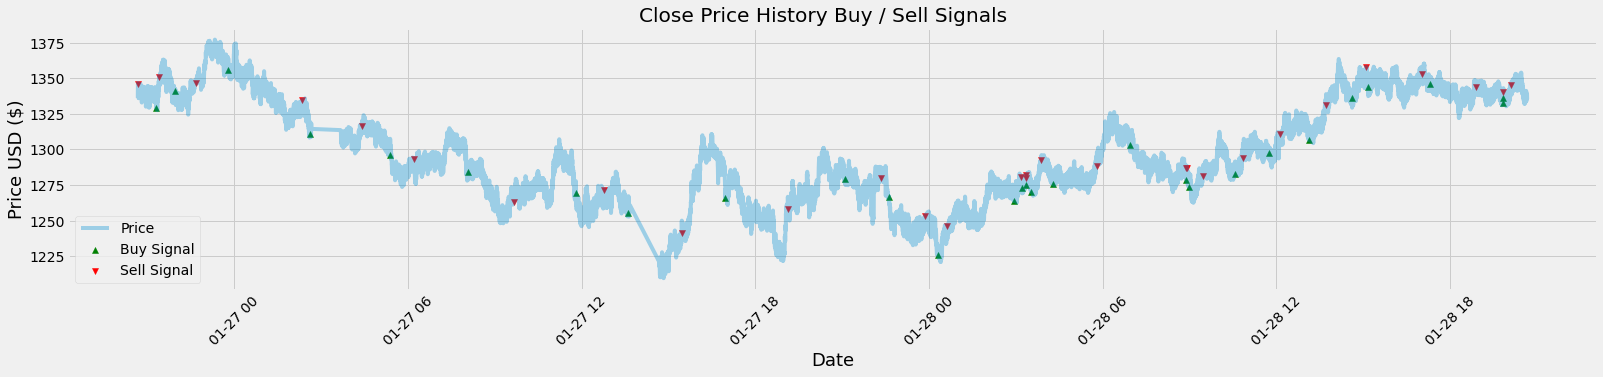

Profit 108.80890200000022
trans:  28


In [35]:
# Function to test the crossover driven profits of the macd and signal lines
def mac_daddy_tester(macd, signal, df):
    bought = False
    sumwin = 0
    transactions = []
    for i in range(1, len(signal)):
        if ( (macd.iat[i] < signal.iat[i]) and (macd.iat[i-1] >= signal.iat[i-1]) and bought == False):
            # print("Crossed above, time to buy", i)
            bought = df.iat[i,1]
        if ( (macd.iat[i] > signal.iat[i]) and (macd.iat[i-1] <= signal.iat[i-1]) and bought):
            # print("Crossed below, time to sell", i)
            # print(df.iat[i,0], "Bought at", bought, " selling at", df.iat[i,1], "for profit:", df.iat[i,1] - bought - 2)
            transactions.append(df.iat[i,1] - bought)
            sumwin = sumwin + df.iat[i,1] - bought - 1
            bought = False 
    return(sumwin, transactions)


#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if MACD > signal line  then buy else sell
      if signal['MACD'][i] < signal['Signal Line'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['price'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif signal['MACD'][i] > signal['Signal Line'][i]: 
        if flag != 0:
          sigPriceSell.append(signal['price'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)


#Create buy and sell columns
x = buy_sell(df)
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]

# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2*2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['price'],  label='Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend( loc='lower left')
plt.show()

r = mac_daddy_tester(MACD, signal, df)
print("Profit", r[0])
print("trans: ", len(r[1]))
# print(r[1])